<a href="https://colab.research.google.com/github/Rishad1999/ImageProcessing/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter intensity level:2


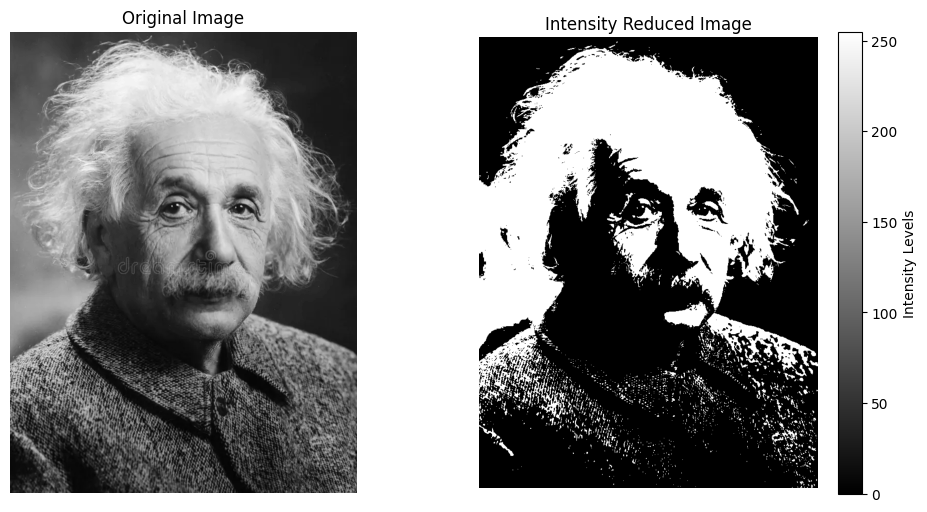

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def reduce_intensity(img, level):
    factor = 255 / (level - 1)
    reduced_image = np.round(img / factor) * factor
    return reduced_image

image = cv2.imread('/content/Image_processing.jpg', cv2.IMREAD_GRAYSCALE) # Load the image

desired_levels = int(input("Enter intensity level:")) #desired_levels should be between 2-256

reduced_image = reduce_intensity(image, desired_levels) #Calling the intensity reducing function

plt.figure(figsize=(12, 6)) # Display the original and intensity reduced images

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reduced_image, cmap='gray')
plt.title('Intensity Reduced Image')
plt.axis('off')
plt.colorbar(label='Intensity Levels')

plt.show()


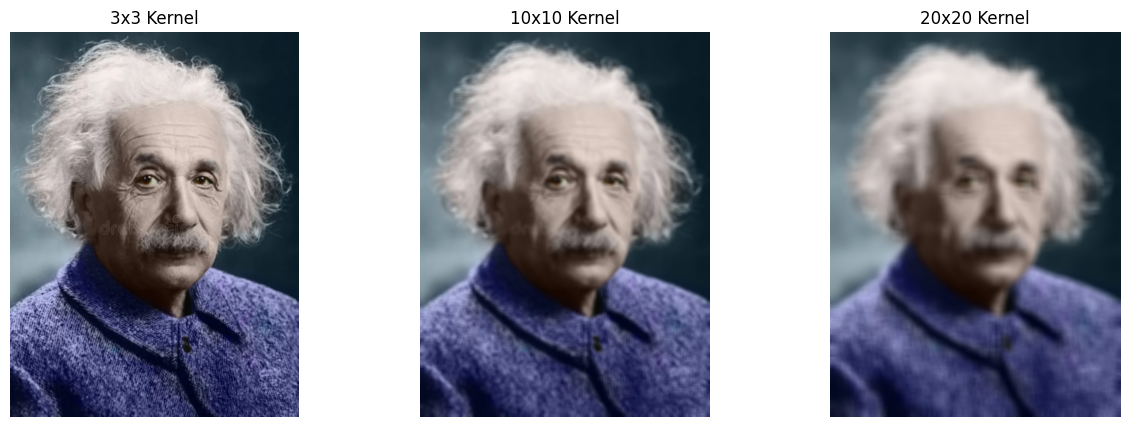

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def simple_average(image, size):
    img_arr = np.array(image, dtype=np.float32) # Convert image to numpy array

    pad_width = size // 2 # Padding the image
    padded_img = np.pad(img_arr, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='edge')

    kernel = np.ones((size, size)) / (size**2) # Define the kernel for averaging

    # Applying the filter for each channel
    avrg_img = np.zeros_like(padded_img)
    for i in range(3):
        avrg_img[:,:,i] = cv2.filter2D(padded_img[:,:,i], -1, kernel)

    return avrg_img.astype(np.uint8)

image_path = '/content/Image_processing.jpg'
image = cv2.imread(image_path)

sizes = [3, 10, 20] # Averaging for different neighborhood sizes
fig, axs = plt.subplots(1, len(sizes), figsize=(15, 5))

for i, size in enumerate(sizes):
    avrg_img = simple_average(image, size)
    axs[i].imshow(cv2.cvtColor(avrg_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'{size}x{size} Kernel')
    axs[i].axis('off')

plt.show()


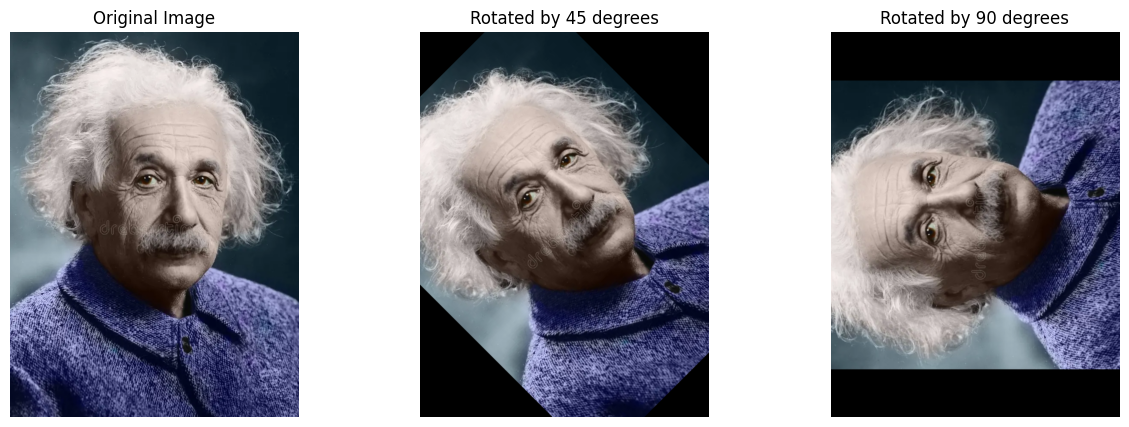

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Image_processing.jpg') # Loading the image

# Get image dimensions
height, width = image.shape[:2]

# Rotate by 45 degrees
rot_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 45, 1)
rot_img_45 = cv2.warpAffine(image, rot_matrix, (width, height))

# Rotate by 90 degrees
rot_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 1)
rot_img_90 = cv2.warpAffine(image, rot_matrix, (width, height))


plt.figure(figsize=(15, 5)) # Plotting the images

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rot_img_45, cv2.COLOR_BGR2RGB))
plt.title('Rotated by 45 degrees')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(rot_img_90, cv2.COLOR_BGR2RGB))
plt.title('Rotated by 90 degrees')
plt.axis('off')

plt.show()


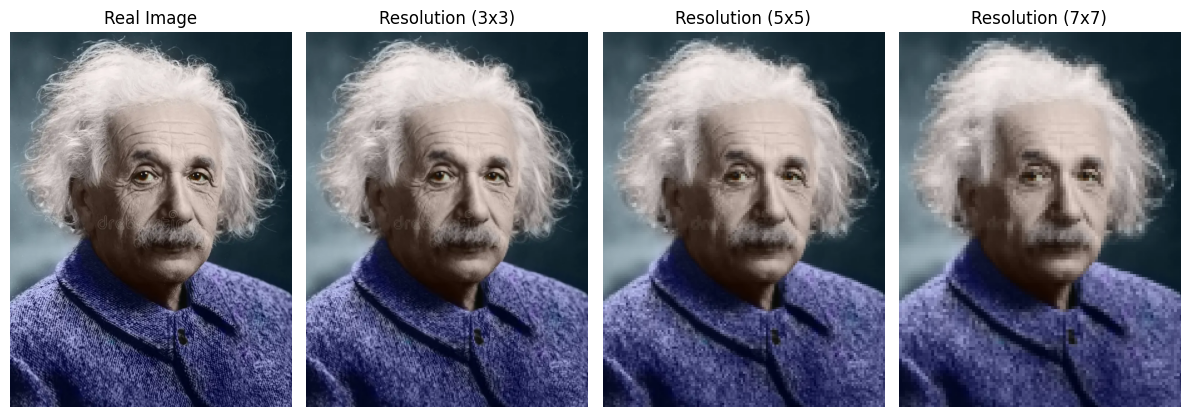

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_resolution(img, block_size):
    h, w, c = img.shape  # Get the number of channels for the image
    new_img = np.zeros_like(img)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img[i:i+block_size, j:j+block_size]
            average_color = np.mean(block, axis=(0, 1))  # Calculate average color for each channel
            new_img[i:i+block_size, j:j+block_size] = average_color

    return new_img

# Load the image
img = cv2.imread('/content/Image_processing.jpg')

# Reduce resolution for 3x3, 5x5, and 7x7 blocks
reduced_3x3 = reduce_resolution(img, 3)
reduced_5x5 = reduce_resolution(img, 5)
reduced_7x7 = reduce_resolution(img, 7)

# Display the original and reduced resolution images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Real Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(reduced_3x3, cv2.COLOR_BGR2RGB))
plt.title('Resolution (3x3)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(reduced_5x5, cv2.COLOR_BGR2RGB))
plt.title('Resolution (5x5)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(reduced_7x7, cv2.COLOR_BGR2RGB))
plt.title('Resolution (7x7)')
plt.axis('off')

plt.tight_layout()
plt.show()
